# Generating random SEDs

This examples generate some random SEDs. After initialising the built-in SED model, we use ``Analyzer`` to sample some input parameters. The ``simplex_transform`` flag ensures that the star formation history parameters are normalised to one.

In [1]:
import torch
import matplotlib.pyplot as plt
import starduster

torch.set_num_threads(1)
torch.manual_seed(seed=111);

In [2]:
sed_model = starduster.MultiwavelengthSED.from_builtin()
sed_model.configure_input_mode(
    sfh_disk=starduster.DiscreteSFH(sed_model, simplex_transform=True),
    sfh_bulge=starduster.DiscreteSFH(sed_model, simplex_transform=True),
    flat_input=True
)

params = starduster.sample_effective_region(sed_model, n_samp=3)
with torch.no_grad():
    samples = sed_model(params, return_lum=False)

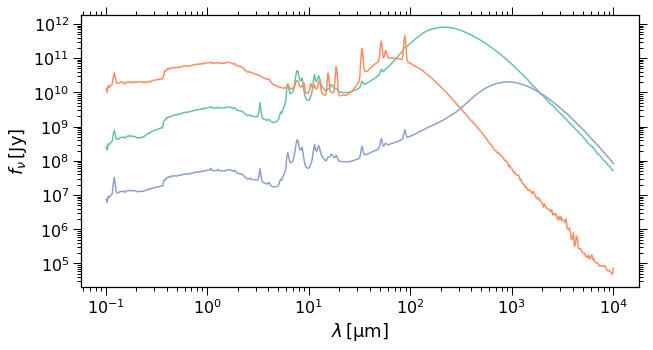

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

for sed in samples:
    ax.plot(sed_model.lam, sed)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\lambda \, [\rm \mu m]$')
ax.set_ylabel(r'$f_\nu \, [\rm Jy]$')

pass